In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/diamonds.csv"

In [ ]:
data  = pd.read_csv(path, sep = ',')

In [ ]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data = data.drop(columns=['Unnamed: 0'])

Предварительная обработка данных

In [ ]:
data.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [ ]:
categorical_features = data[['cut', 'color', 'clarity']].copy()
numeric_features = data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].copy()

In [ ]:
categorical_features, numeric_features

(             cut color clarity
 0          Ideal     E     SI2
 1        Premium     E     SI1
 2           Good     E     VS1
 3        Premium     I     VS2
 4           Good     J     SI2
 ...          ...   ...     ...
 53935      Ideal     D     SI1
 53936       Good     D     SI1
 53937  Very Good     D     SI1
 53938    Premium     H     SI2
 53939      Ideal     D     SI2
 
 [53940 rows x 3 columns],
        carat  depth  table  price     x     y     z
 0       0.23   61.5   55.0    326  3.95  3.98  2.43
 1       0.21   59.8   61.0    326  3.89  3.84  2.31
 2       0.23   56.9   65.0    327  4.05  4.07  2.31
 3       0.29   62.4   58.0    334  4.20  4.23  2.63
 4       0.31   63.3   58.0    335  4.34  4.35  2.75
 ...      ...    ...    ...    ...   ...   ...   ...
 53935   0.72   60.8   57.0   2757  5.75  5.76  3.50
 53936   0.72   63.1   55.0   2757  5.69  5.75  3.61
 53937   0.70   62.8   60.0   2757  5.66  5.68  3.56
 53938   0.86   61.0   58.0   2757  6.15  6.12  3.74
 539

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorial_encoded = categorical_features.apply(le.fit_transform)

In [ ]:
categorial_encoded

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
...,...,...,...
53935,2,0,2
53936,1,0,2
53937,4,0,2
53938,3,4,3


In [ ]:
categorial_encoded.reset_index(drop=True, inplace=True)
numeric_features.reset_index(drop=True, inplace=True)

In [ ]:
data_2 = pd.concat([categorial_encoded, numeric_features], axis = 1)

In [ ]:
data_2

,cut,color,clarity,carat,depth,table,price,x,y,z
0,2,1,3,0.23,61.5,55.0,326,3.95,3.98,2.43
1,3,1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
2,1,1,4,0.23,56.9,65.0,327,4.05,4.07,2.31
3,3,5,5,0.29,62.4,58.0,334,4.20,4.23,2.63
4,1,6,3,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2,0,2,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,1,0,2,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,4,0,2,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,3,4,3,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# Среднее значение
mymean = data_2.mean(axis=0)
# Стандартное отклонение
mystd = data_2.std(axis=0)
data_2 -= mymean
data_2 /= mystd
data_2

,cut,color,clarity,carat,depth,table,price,x,y,z
0,-0.538094,-0.937154,-0.484260,-1.198157,-0.174090,-1.099662,-0.904087,-1.587823,-1.536181,-1.571115
1,0.434945,-0.937154,-1.064107,-1.240350,-1.360726,1.585514,-0.904087,-1.641310,-1.658759,-1.741159
2,-1.511133,-0.937154,0.095588,-1.198157,-3.384987,3.375631,-0.903836,-1.498677,-1.457382,-1.741159
3,0.434945,1.414259,0.675435,-1.071577,0.454129,0.242926,-0.902081,-1.364959,-1.317293,-1.287708
4,-1.511133,2.002112,-0.484260,-1.029384,1.082348,0.242926,-0.901831,-1.240155,-1.212227,-1.117663
...,...,...,...,...,...,...,...,...,...,...
53935,-0.538094,-1.525007,-1.064107,-0.164426,-0.662705,-0.204603,-0.294728,0.016798,0.022304,-0.054887
53936,-1.511133,-1.525007,-1.064107,-0.164426,0.942744,-1.099662,-0.294728,-0.036690,0.013548,0.100987
53937,1.407985,-1.525007,-1.064107,-0.206619,0.733338,1.137985,-0.294728,-0.063434,-0.047740,0.030135
53938,0.434945,0.826406,-0.484260,0.130926,-0.523100,0.242926,-0.294728,0.373380,0.337503,0.285201


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cut      53940 non-null  float64
 1   color    53940 non-null  float64
 2   clarity  53940 non-null  float64
 3   carat    53940 non-null  float64
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(10)
memory usage: 4.1 MB


In [ ]:
print(data.isnull().values.any())

False


In [ ]:
data_2.describe()

,cut,color,clarity,carat,depth,table,price,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,1.404224e-16,-1.148671e-16,-3.372246e-17,2.149807e-16,-4.002434e-15,1.175017e-16,-1.095980e-16,2.508108e-16,-2.107654e-17,-2.023348e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.484173e+00,-1.525007e+00,-2.223803e+00,-1.261446e+00,-1.308748e+01,-6.470013e+00,-9.040868e-01,-5.109073e+00,-5.020884e+00,-5.014510e+00
25%,-5.380940e-01,-9.371541e-01,-1.064107e+00,-8.395154e-01,-5.231005e-01,-6.521325e-01,-7.476738e-01,-9.103164e-01,-8.882717e-01,-8.909378e-01
50%,-5.380940e-01,2.385525e-01,9.558778e-02,-2.066190e-01,3.531645e-02,-2.046032e-01,-3.839636e-01,-2.777527e-02,-2.147379e-02,-1.237607e-02
75%,4.349453e-01,8.264057e-01,6.754354e-01,5.106635e-01,5.239313e-01,6.904554e-01,3.487834e-01,7.210475e-01,7.052356e-01,7.103118e-01
max,1.407985e+00,2.002112e+00,1.835131e+00,8.885992e+00,1.204128e+01,1.680151e+01,3.732404e+00,4.465161e+00,4.654922e+01,4.004720e+01


Подготовка данных к построению нейронных сетей

In [ ]:
y = data_2['price']

In [ ]:
y

,price
0,-0.904087
1,-0.904087
2,-0.903836
3,-0.902081
4,-0.901831
...,...
53935,-0.294728
53936,-0.294728
53937,-0.294728
53938,-0.294728


In [ ]:
del data_2['price']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_2, y, test_size=0.33, random_state=42)

In [ ]:
pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import tensorflow as tf

In [ ]:
x_train_tensor = tf.constant(x_train)

In [ ]:
y_train_tensor = tf.constant(y_train)

Нейронные сети и их архитектуры



In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(16,input_shape=(9,),activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dense(32,activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(32,activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(13,activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(16,activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(16,activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(1,activation=None)
                            ])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.mse
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 13)                429       
                                                                 
 dense_5 (Dense)             (None, 16)                224       
                                                                 
 dense_6 (Dense)             (None, 16)                2

In [ ]:
history = model.fit(x_train_tensor,y_train_tensor,batch_size=64,epochs=100,validation_split = 0.2)

Epoch 1/100
452/452 [==============================] - 3s 3ms/step - loss: 0.3192 - val_loss: 0.1609
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 0.1527 - val_loss: 0.1301
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 0.1256 - val_loss: 0.1095
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 0.1057 - val_loss: 0.0919
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0833 - val_loss: 0.0715
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0693 - val_loss: 0.0651
Epoch 7/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0620 - val_loss: 0.0582
Epoch 8/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0572 - val_loss: 0.0537
Epoch 9/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0538 - val_loss: 0.0511
Epoch 10/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0525 - val_lo

In [ ]:
model.save('/content/drive/MyDrive/model.keras')

In [ ]:
pip install tf2onnx

In [ ]:
import tensorflow as tf
import tf2onnx

In [ ]:
input_shape = (9,)
spec = (tf.TensorSpec((None, *input_shape), tf.float32, name="input"),)
output_path = "/content/drive/MyDrive/model.onnx"
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, output_path=output_path)


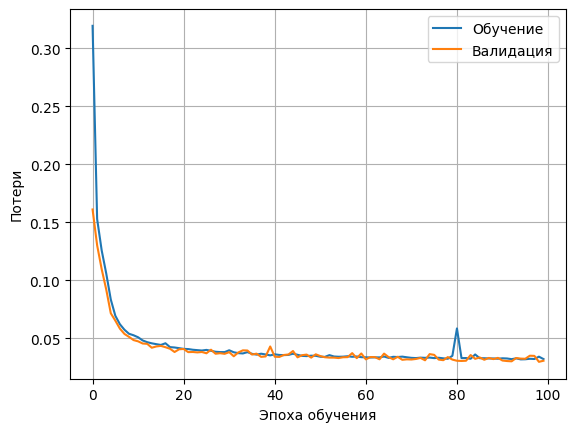

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Обучение')
plt.plot(history.history['val_loss'], label = 'Валидация')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import tracemalloc
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os

In [ ]:
#отслеживание распределения памяти
tracemalloc.start()
#отслеживание времени работы программы
start_time = time.time()

pred = model.predict(x_test)

end_time = time.time()
current, peak = tracemalloc.get_traced_memory()

print(f"Текущее использование памяти: {current / 10**6} MB")
print(f"Пиковое использование памяти: {peak / 10**6} MB")

tracemalloc.stop()

inference_time = end_time - start_time
print(f"Время инференса: {inference_time:.4f} секунд")


557/557 [==============================] - 1s 2ms/step
Текущее использование памяти: 2.418403 MB
Пиковое использование памяти: 2.704004 MB
Время инференса: 1.9400 секунд


In [ ]:
y_test = y_test.reset_index(drop=True)

In [ ]:
vec = np.array([])
for i in np.arange(0, len(pred)):
  vec = np.append(vec, pred[i][0])
for i in np.arange(0, len(y_test)):
  print("Предсказанное значение:", pred[i][0], ", правильное значение:", y_test[i], 'разница: ', np.abs(pred[i][0] - y_test[i]))

Выходные данные были обрезаны до нескольких последних строк (5000).
Предсказанное значение: -0.78454214 , правильное значение: -0.7519350883357471 разница:  0.03260705500913208
Предсказанное значение: -0.89140034 , правильное значение: -0.8862897935528367 разница:  0.0051105436664016235
Предсказанное значение: -0.45280594 , правильное значение: -0.4173016341103466 разница:  0.035504302226170736
Предсказанное значение: -0.8242799 , правильное значение: -0.8308935438271337 разница:  0.006613639461594101
Предсказанное значение: -0.27294862 , правильное значение: -0.24008376734078993 разница:  0.03286485536276232
Предсказанное значение: -0.8265152 , правильное значение: -0.7782545734995426 разница:  0.048260624254363615
Предсказанное значение: -0.48649734 , правильное значение: -0.4807190602669206 разница:  0.005778282319596761
Предсказанное значение: 3.1559112 , правильное значение: 3.4719662878082405 разница:  0.3160550806091438
Предсказанное значение: -0.700233 , правильное значение: -0

In [ ]:
СС_tuner = np.corrcoef(vec, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициент корреляции с истинными данными: {СС_tuner}')

Коэффициент корреляции с истинными данными: 0.9891891464584609


In [ ]:
#вычисление MSE и MAE
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print(f'Среднеквадратичная ошибка (MSE) на тестовой выборке: {mse}')
print(f'Средняя абсолютная ошибка (MAE) на тестовой выборке: {mae}')


Среднеквадратичная ошибка (MSE) на тестовой выборке: 0.02166861648637416
Средняя абсолютная ошибка (MAE) на тестовой выборке: 0.08601169545860346


In [ ]:
model_path = "/content/drive/MyDrive/model.keras"
model_size = os.path.getsize(model_path)
print(f"Model Size: {model_size / (1024 * 1024)} MB")

Model Size: 0.08871841430664062 MB
